In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Loading Datasets and Importing required libraries**

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_text
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [171]:
file=pd.read_csv("/content/drive/MyDrive/Datasets/Customers.csv")
file.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Purchase
0,1,Male,19,15000,39,Healthcare,1,4,Yes
1,2,Male,21,35000,81,Engineer,3,3,Yes
2,3,Female,20,86000,6,Engineer,1,1,Yes
3,4,Female,23,59000,77,Lawyer,0,2,No
4,5,Female,31,38000,40,Entertainment,2,6,Yes


#**Storing unique dependent variables for decision tree**

In [172]:
target_values=file["Purchase"].unique()

#**Basic EDA**

In [173]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
 8   Purchase                2000 non-null   object
dtypes: int64(6), object(3)
memory usage: 140.8+ KB


**Handling Null values**

In [174]:
file.isna().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
Purchase                   0
dtype: int64

In [175]:
file.dropna(inplace=True)

In [176]:
file.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
Purchase                  0
dtype: int64

In [177]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1965 non-null   int64 
 1   Gender                  1965 non-null   object
 2   Age                     1965 non-null   int64 
 3   Annual Income ($)       1965 non-null   int64 
 4   Spending Score (1-100)  1965 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         1965 non-null   int64 
 7   Family Size             1965 non-null   int64 
 8   Purchase                1965 non-null   object
dtypes: int64(6), object(3)
memory usage: 153.5+ KB


**Handling outliers in all the numeric data**

In [178]:
for column in file.select_dtypes(include=["int"]).columns:
  q1=file[column].quantile(0.25)
  q3=file[column].quantile(0.75)
  iqr=q3-q1
  lb=q1-1.5*iqr
  ub=q3+1.5*iqr
  file=file[(file[column]<ub)&(file[column]>lb)]

In [179]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1955 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              1955 non-null   int64 
 1   Gender                  1955 non-null   object
 2   Age                     1955 non-null   int64 
 3   Annual Income ($)       1955 non-null   int64 
 4   Spending Score (1-100)  1955 non-null   int64 
 5   Profession              1955 non-null   object
 6   Work Experience         1955 non-null   int64 
 7   Family Size             1955 non-null   int64 
 8   Purchase                1955 non-null   object
dtypes: int64(6), object(3)
memory usage: 152.7+ KB


#Interpretation
**Around 10 outliers are removed which if present may cause hinderance to the overall analysis**

In [180]:
gender_pivot=pd.pivot_table(file,index=["Gender"],values=["Annual Income ($)","Spending Score (1-100)"],aggfunc="mean")
gender_pivot

,Annual Income ($),Spending Score (1-100)
Gender,,
Female,110440.189655,51.129310
Male,110896.857862,51.155975


#Interpretation
**This is the pivot table based on gender which shows average of annual income and spending score**

**This helps us to gain the knowledge of distribution of income and how the user is spending their money based on different genders**

**This helps getting one of the most crucial part of our dataset**

In [181]:
gender_pivot=pd.pivot_table(file,index=["Gender","Work Experience"],values=["Annual Income ($)","Spending Score (1-100)"],aggfunc="mean")
gender_pivot

Annual Income ($)  Spending Score (1-100)
Gender Work Experience                                           
Female 0                    105224.813765               52.712551
       1                    108098.439446               50.083045
       2                    111262.297297               54.864865
       3                    114116.392857               63.535714
       4                    113056.256757               53.594595
       5                    102187.850746               48.432836
       6                    118403.267606               52.605634
       7                    112331.450704               49.464789
       8                    113937.673913               49.478261
       9                    114039.989474               42.894737
       10                   118459.808511               57.914894
       11                   129459.857143               49.428571
       12                   123391.545455               51.000000
       13                   108243.250000               34.000000
       14                   131224.750000               69.750000
       15                   113727.250000               57.875000
Male   0                    107666.474576               49.112994
       1                    106872.610169               52.214689
       2                     97452.041667               60.000000
       3                    112260.520000               53.280000
       4                    115242.978723               45.234043
       5                    108409.377778               50.177778
       6                    117184.500000               58.541667
       7                    110134.081633               52.061224
       8                    116674.000000               52.680556
       9                    114133.483871               50.919355
       10                   112181.388889               49.250000
       11                   110060.000000               46.166667
       12                   106101.600000               41.200000
       13                   143906.625000               51.375000
       14                   135746.750000               37.375000
       15                   130754.166667               50.166667

#Interpretation
**This is similar to the above pivot but the difference is that it expands its study based on years of experience of different gender**

**This covers another aspect of our dataset which will play a pivotal role in our analysis**

**We can see that with more than 2-3 years of experience the annual icnome is stabale upto 10 years but spending is fluctuating, it is not at all fixed**

In [182]:
profession_group=file.groupby("Profession")
profession_group.size()

Profession
Artist           608
Doctor           160
Engineer         178
Entertainment    234
Executive        152
Healthcare       338
Homemaker         60
Lawyer           140
Marketing         85
dtype: int64

In [183]:
profession_group["Annual Income ($)"].mean()

Profession
Artist           108587.365132
Doctor           111792.006250
Engineer         111323.466292
Entertainment    110650.333333
Executive        113835.092105
Healthcare       112559.603550
Homemaker        108758.616667
Lawyer           111463.735714
Marketing        107994.211765
Name: Annual Income ($), dtype: float64

In [184]:
profession_group["Spending Score (1-100)"].mean()

Profession
Artist           52.782895
Doctor           51.693750
Engineer         49.044944
Entertainment    52.940171
Executive        49.993421
Healthcare       50.642012
Homemaker        46.383333
Lawyer           48.985714
Marketing        48.717647
Name: Spending Score (1-100), dtype: float64

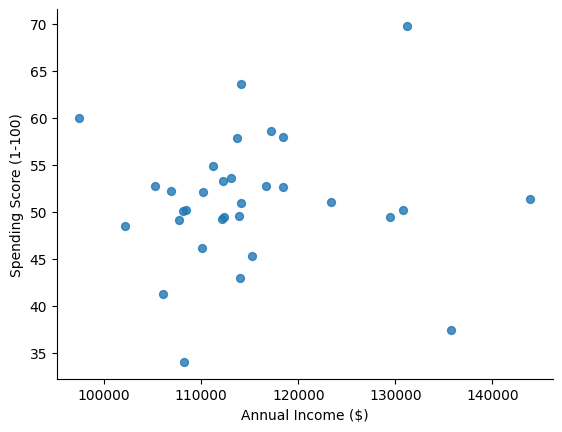

In [185]:
gender_pivot.plot(kind='scatter', x='Annual Income ($)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#Interpretation
**This scatter plot shows the dependency of two most crucial attribute in out dataset. The spending score and the annual income.**

**As expected the spending score is directly increasing with increase in the annual income which was not very clear in the above analysis**

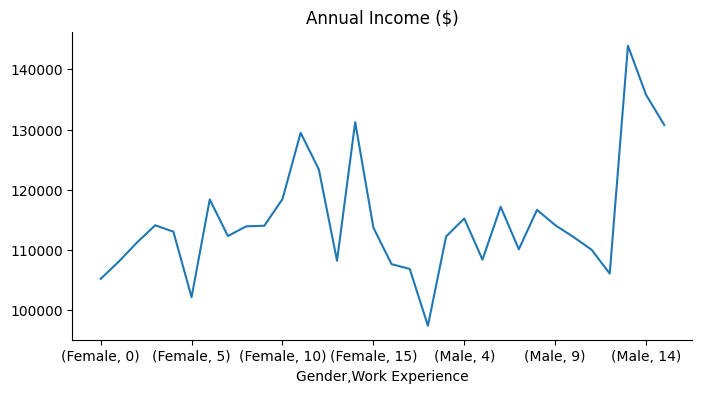

In [186]:
gender_pivot['Annual Income ($)'].plot(kind='line', figsize=(8, 4), title='Annual Income ($)')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Annual Income ($)', ylabel='Count'>

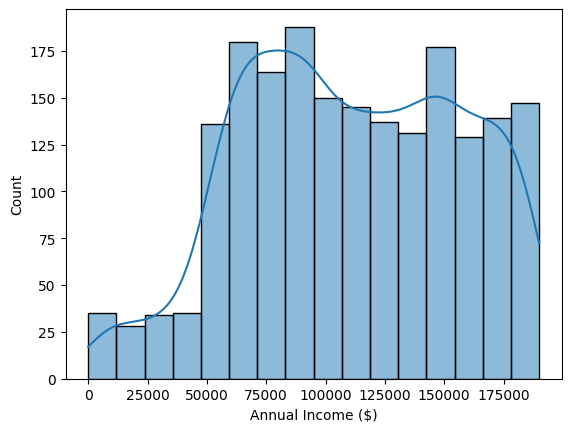

In [214]:
sns.histplot(file["Annual Income ($)"],kde=True)

<Axes: xlabel='Spending Score (1-100)', ylabel='Count'>

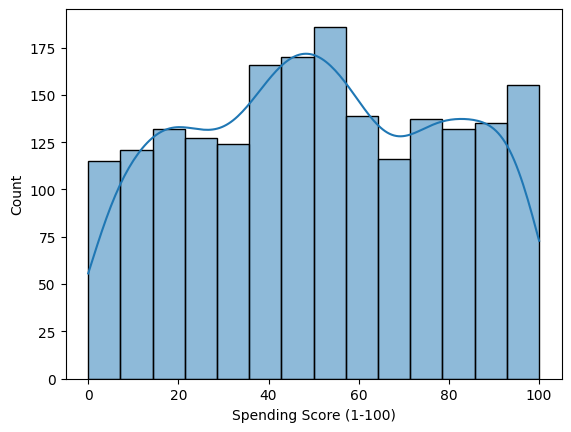

In [188]:
sns.histplot(file["Spending Score (1-100)"],kde=True)

<Axes: xlabel='Age', ylabel='Count'>

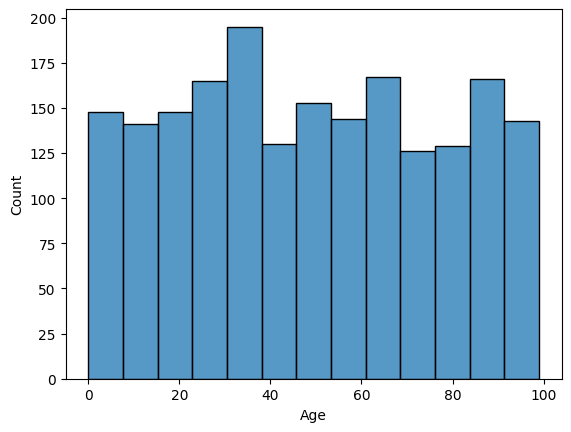

In [212]:
sns.histplot(file["Age"])

#Interpretation
**The above two distribution plot shows that the values are almost normally distributed and almost within a specific range**

<Axes: xlabel='Profession', ylabel='Annual Income ($)'>

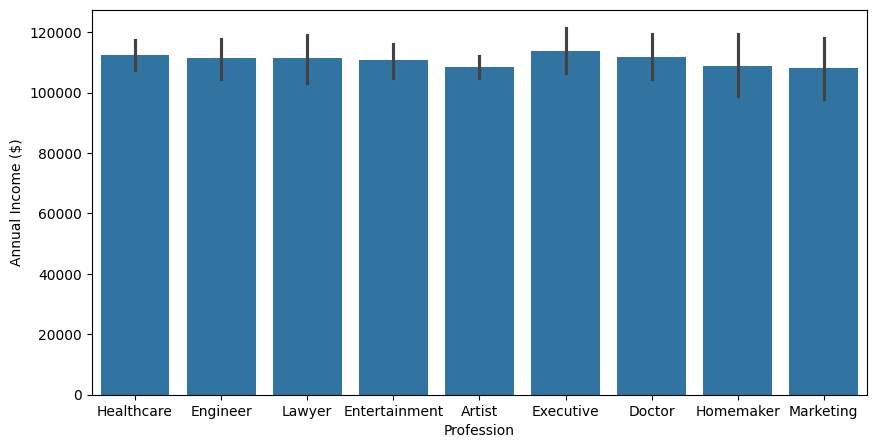

In [189]:
plt.figure(figsize=(10,5))
sns.barplot(x=file["Profession"],y=file["Annual Income ($)"],estimator=np.mean)

<Axes: xlabel='Gender', ylabel='Annual Income ($)'>

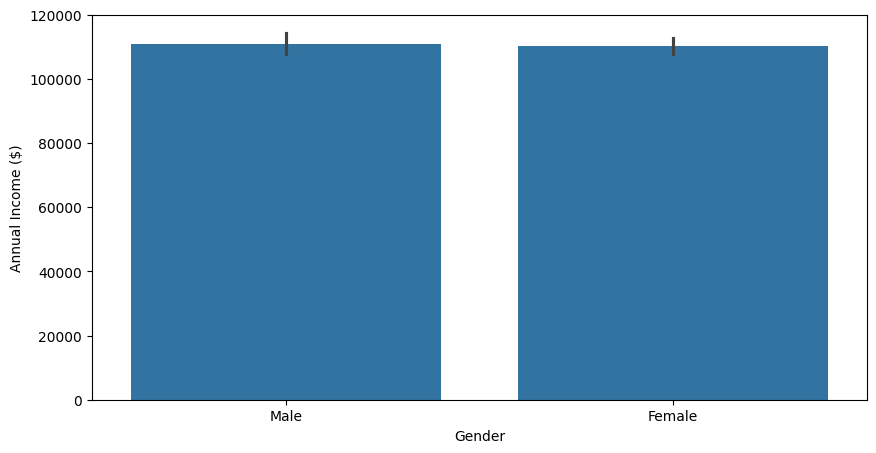

In [190]:
plt.figure(figsize=(10,5))
sns.barplot(x=file["Gender"],y=file["Annual Income ($)"],estimator=np.mean)

In [191]:
file.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000,1955.000000
mean,1002.955499,48.935550,110625.893606,51.140153,4.029156,3.757545
std,578.698147,28.432324,45896.823735,27.941429,3.834427,1.969194
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,502.500000,25.000000,74280.500000,28.000000,1.000000,2.000000
50%,1005.000000,48.000000,109759.000000,50.000000,3.000000,4.000000
75%,1504.500000,73.000000,149170.000000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,15.000000,9.000000


In [192]:
file.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Purchase
0,1,Male,19,15000,39,Healthcare,1,4,Yes
1,2,Male,21,35000,81,Engineer,3,3,Yes
2,3,Female,20,86000,6,Engineer,1,1,Yes
3,4,Female,23,59000,77,Lawyer,0,2,No
4,5,Female,31,38000,40,Entertainment,2,6,Yes


In [204]:
features=file[["Gender","Profession","Purchase"]]
label_encoder={}
for column in features.columns:
  label_encoder[column]=LabelEncoder()
  file[column]=label_encoder[column].fit_transform(file[column])

In [205]:
file.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Purchase
0,1,1,19,15000,39,5,1,4,1
1,2,1,21,35000,81,2,3,3,1
2,3,0,20,86000,6,2,1,1,1
3,4,0,23,59000,77,7,0,2,0
4,5,0,31,38000,40,3,2,6,1


Accuracy: 0.4855195911413969
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.56      0.50       275
           1       0.52      0.42      0.46       312

    accuracy                           0.49       587
   macro avg       0.49      0.49      0.48       587
weighted avg       0.49      0.49      0.48       587

Confusion Matrix:
[[154 121]
 [181 131]]


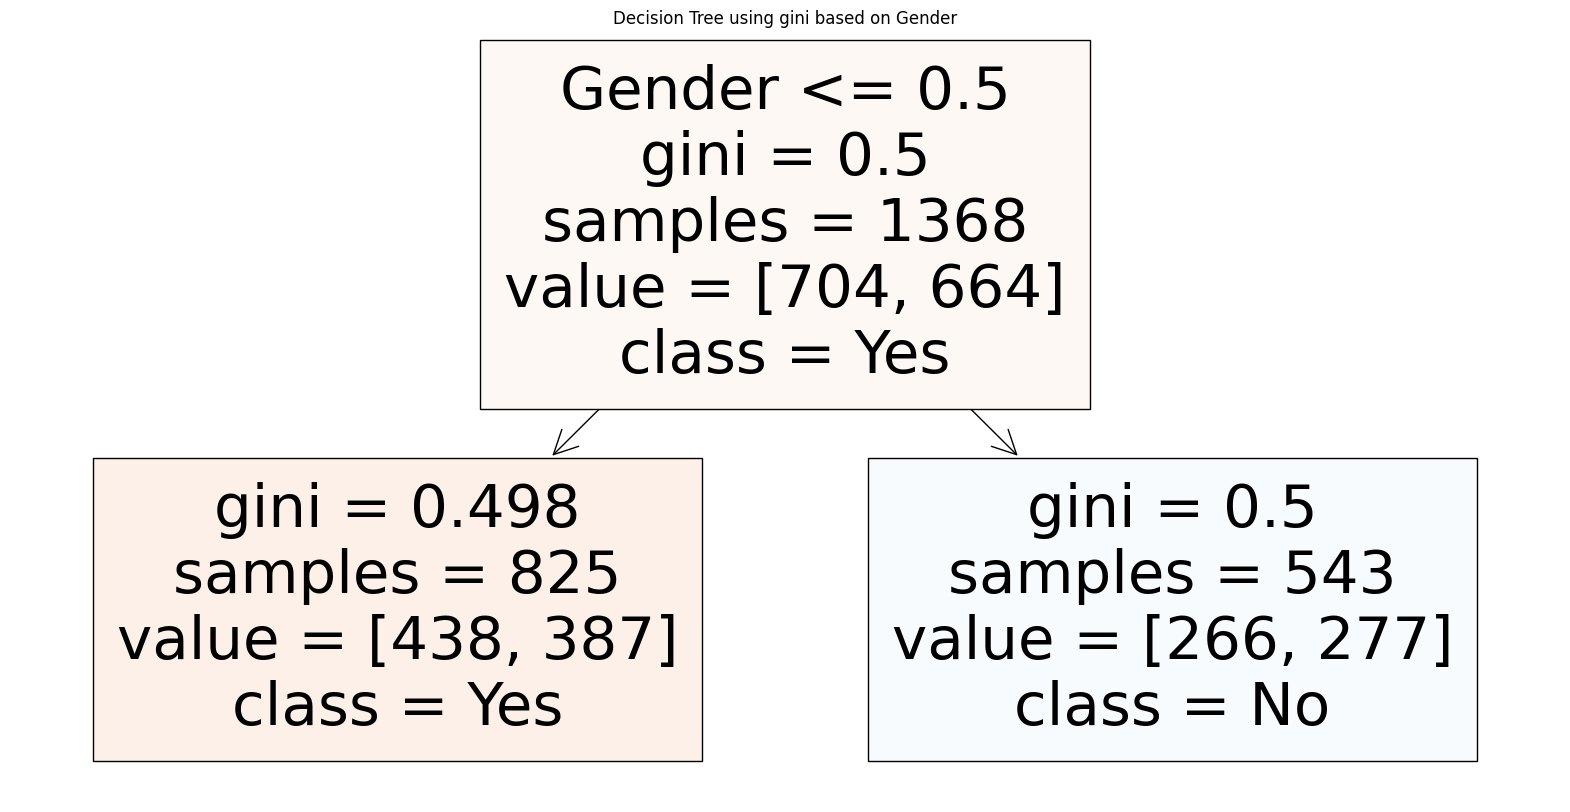

In [206]:
variables=file.iloc[:,1:2]
target=file["Purchase"]
x_train,x_test,y_train,y_test=train_test_split(variables,target,test_size=0.3,random_state=42)
def decision_tree_classifier(criterion):
  dtc_model=DecisionTreeClassifier(criterion=criterion,random_state=42)
  dtc_model.fit(x_train,y_train)
  y_pred=dtc_model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))

  plt.figure(figsize=(20,10))
  plot_tree(dtc_model, filled=True, feature_names=variables.columns, class_names=target_values)
  plt.title(f"Decision Tree using {criterion} based on Gender")
  plt.show()
decision_tree_classifier("gini")

#Interpretation
**The decision tree classifier constructed based on gender demonstrates a straightforward and easily interpretable model due to the limited number of unique categories present in the data.**

**With only a few categories, the decision tree makes clear binary splits at each node based on the gender attribute. This means that at each decision point, the data is divided into distinct groups without much complexity.**

Accuracy: 0.47700170357751276
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.75      0.57       275
           1       0.52      0.24      0.33       312

    accuracy                           0.48       587
   macro avg       0.49      0.49      0.45       587
weighted avg       0.49      0.48      0.44       587

Confusion Matrix:
[[206  69]
 [238  74]]


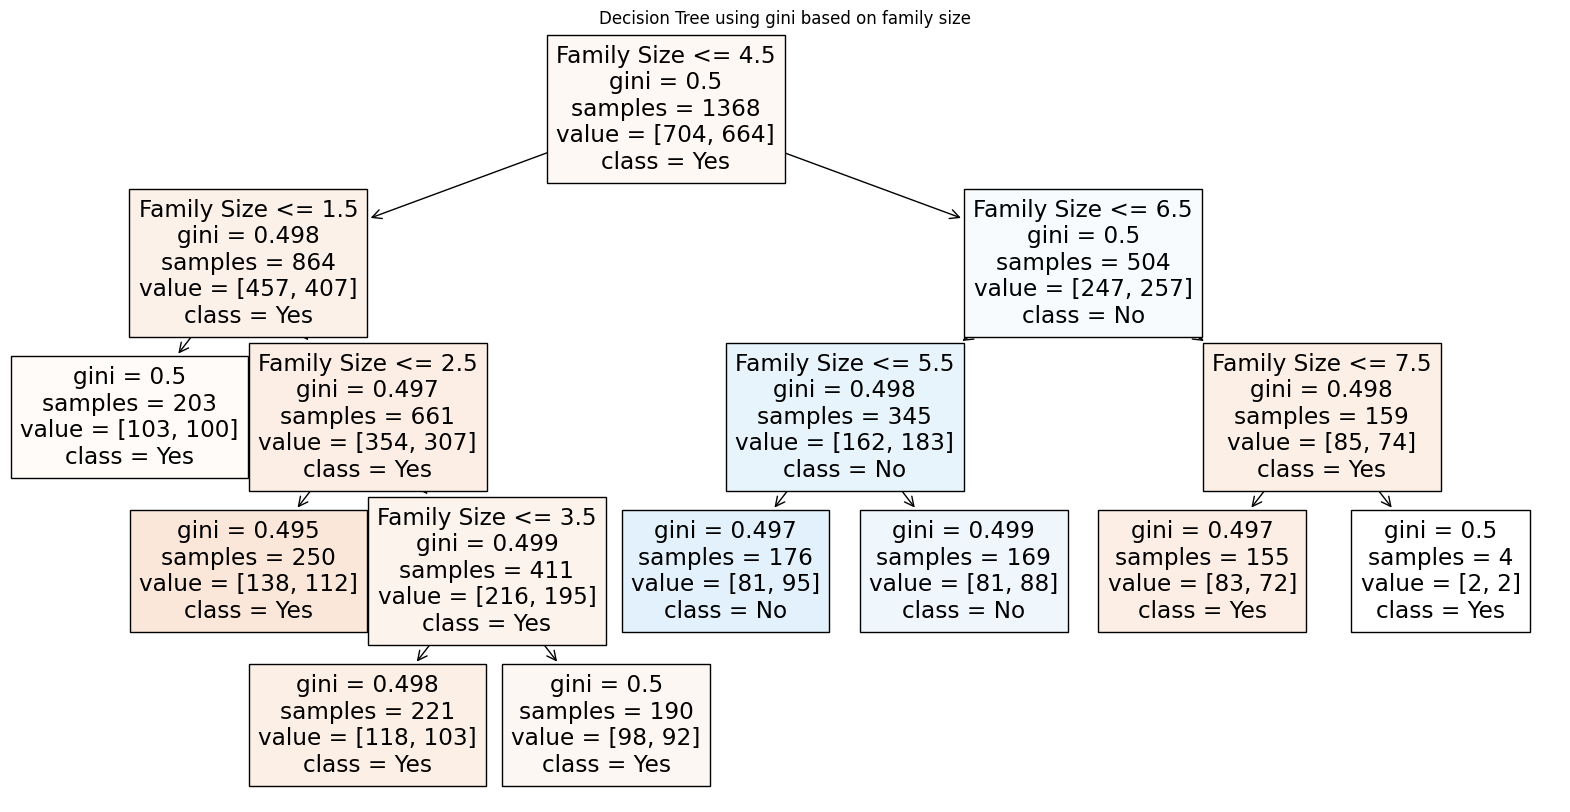

In [207]:
variables=file.iloc[:,7:8]
target=file["Purchase"]
x_train,x_test,y_train,y_test=train_test_split(variables,target,test_size=0.3,random_state=42)
def decision_tree_classifier(criterion):
  dtc_model=DecisionTreeClassifier(criterion=criterion,random_state=42)
  dtc_model.fit(x_train,y_train)
  y_pred=dtc_model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))

  plt.figure(figsize=(20,10))
  plot_tree(dtc_model, filled=True, feature_names=variables.columns, class_names=target_values)
  plt.title(f"Decision Tree using {criterion} based on family size")
  plt.show()
decision_tree_classifier("gini")

#Interpretation
**Family size can significantly impact purchasing decisions. Larger families might have different buying patterns compared to smaller families or individuals. The decision tree aims to capture these distinctions by segmenting customers based on family size.**

**The range of family sizes from 1 to 10 implies that the decision tree considers a spectrum of household compositions, each potentially influencing the likelihood of purchasing the product.**

**The decision tree will have multiple decision nodes corresponding to different family size thresholds. For instance, it may split customers into groups like family size ≤ 3, family size 4-6, and family size > 6, or it may use finer splits depending on the data and model complexity.**

Accuracy: 0.5025553662691652
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.72      0.58       275
           1       0.56      0.31      0.40       312

    accuracy                           0.50       587
   macro avg       0.52      0.52      0.49       587
weighted avg       0.52      0.50      0.48       587

Confusion Matrix:
[[199  76]
 [216  96]]


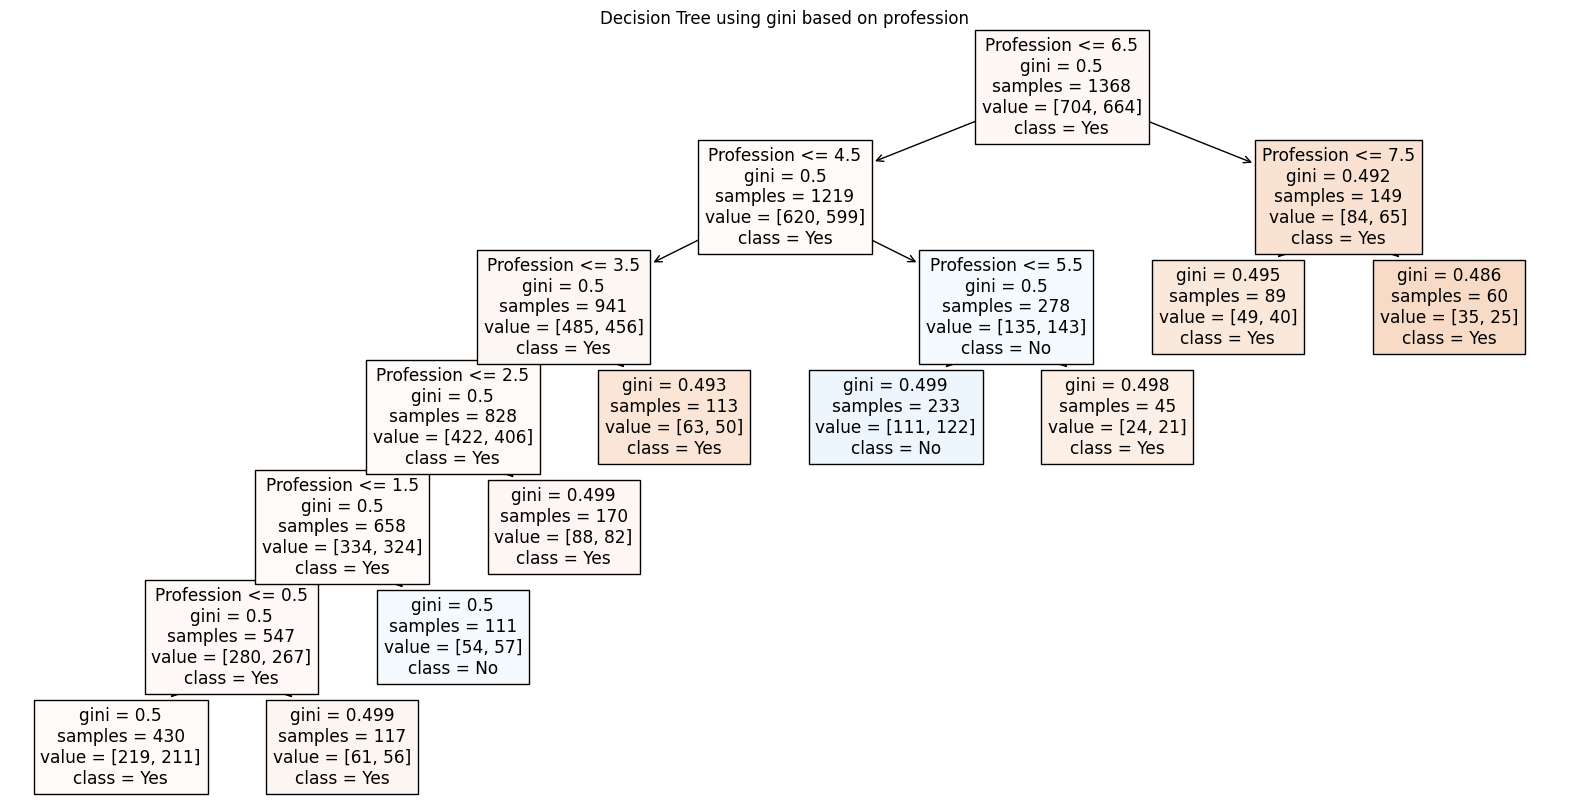

In [210]:
variables=file.iloc[:,5:6]
target=file["Purchase"]
x_train,x_test,y_train,y_test=train_test_split(variables,target,test_size=0.3,random_state=42)
def decision_tree_classifier(criterion):
  dtc_model=DecisionTreeClassifier(criterion=criterion,random_state=42)
  dtc_model.fit(x_train,y_train)
  y_pred=dtc_model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))

  plt.figure(figsize=(20,10))
  plot_tree(dtc_model, filled=True, feature_names=variables.columns, class_names=target_values)
  plt.title(f"Decision Tree using {criterion} based on profession")
  plt.show()
decision_tree_classifier("gini")

#Interpretation
**The decision tree classifier integrating customer profession into the prediction of their purchase decision introduces a notable level of complexity due to the diversity of professions and the subsequent label encoding**

**With nine distinct professions (artist, doctor, engineer, entertainment, executive, healthcare, homemaker, lawyer, marketing), the decision tree aims to capture how each profession type influences the likelihood of a customer making a purchase.**

**The encoded values allow the decision tree to treat professions as categorical variables while internally representing them in a numerical format suitable for computation.**

**The decision tree likely contains multiple decision nodes corresponding to different profession thresholds. It may split customers into groups such as doctors vs. non-doctors, executives vs. non-executives, etc.**

**Insights from the decision tree can guide targeted marketing efforts. For instance, specific promotions or product recommendations can be tailored based on the predicted behavior of customers across different professions.**

Accuracy: 0.5281090289608177
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       275
           1       0.56      0.53      0.54       312

    accuracy                           0.53       587
   macro avg       0.53      0.53      0.53       587
weighted avg       0.53      0.53      0.53       587

Confusion Matrix:
[[145 130]
 [147 165]]


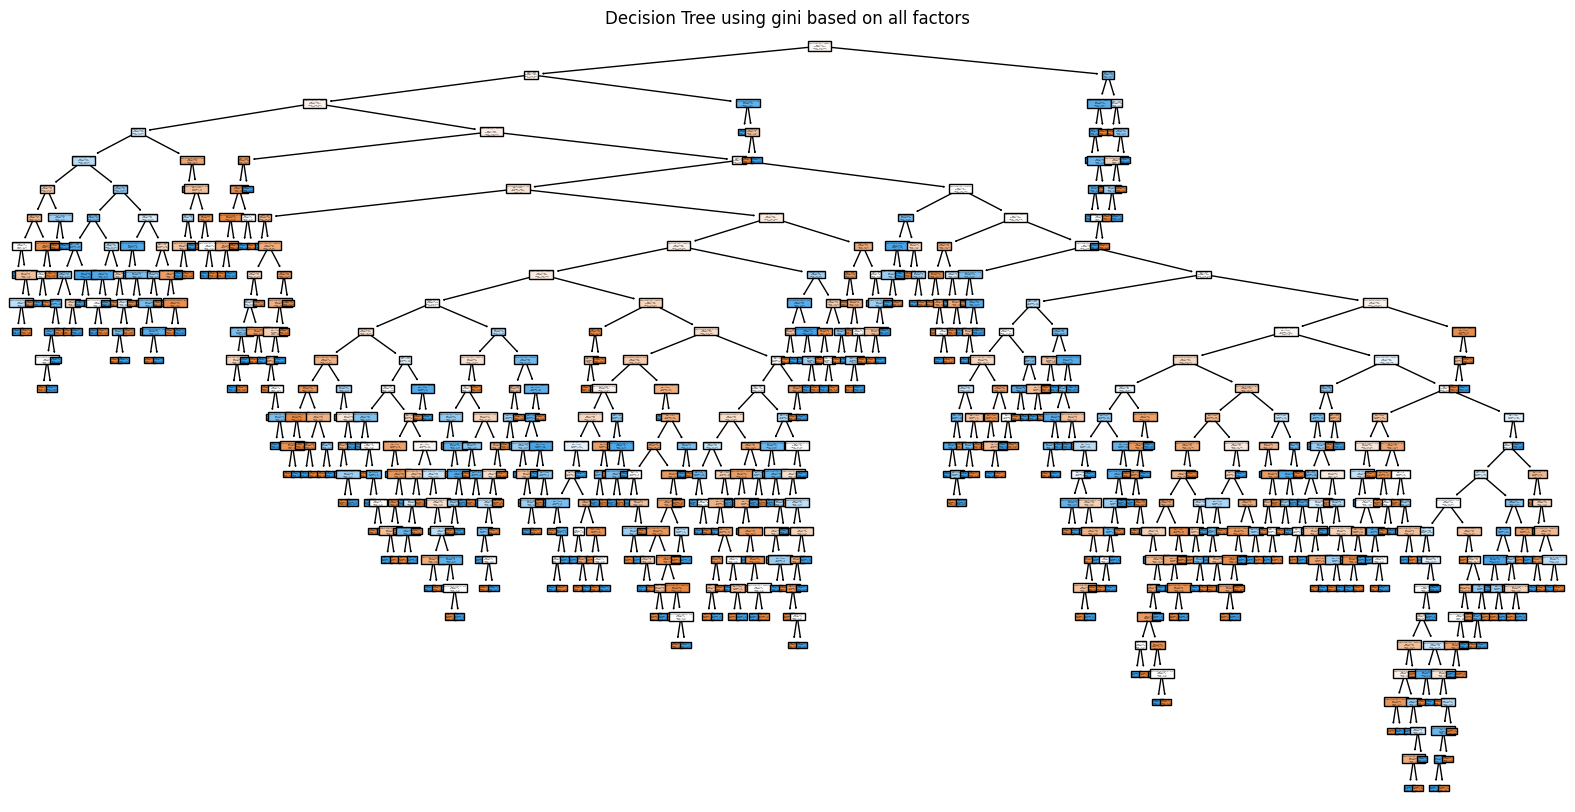

In [215]:
variables=file.iloc[:,1:8]
target=file["Purchase"]
x_train,x_test,y_train,y_test=train_test_split(variables,target,test_size=0.3,random_state=42)
def decision_tree_classifier(criterion):
  dtc_model=DecisionTreeClassifier(criterion=criterion,random_state=42)
  dtc_model.fit(x_train,y_train)
  y_pred=dtc_model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))

  plt.figure(figsize=(20,10))
  plot_tree(dtc_model, filled=True, feature_names=variables.columns, class_names=target_values)
  plt.title(f"Decision Tree using {criterion} based on all factors")
  plt.show()
decision_tree_classifier("gini")

#Interpretation

**The decision tree likely incorporates multiple decision nodes, each representing splits based on different combinations of age, gender, profession, income, spending score, work experience, and family size.**

**Navigating through the decision tree's paths requires understanding the combined impact of multiple features, which can be intricate given the range and diversity of encoded variables.**

**Insights from the model can guide targeted marketing efforts tailored to specific customer segments defined by age, gender, profession, income level, spending behavior, work experience, and family size.**

**Understanding how these features collectively influence purchase decisions can inform product customization, pricing strategies, and the development of new offerings aligned with customer preferences and needs.**

